In [60]:
import pandas as pd
import numpy as np

#데이터셋 불러오기
df = pd.read_csv("netflix_reviews.csv", encoding='utf-8')

# 데이터셋 크기와 열 정보 출력
print(f"Shape of the dataset: {df.shape}")
print(f"Columns in the dataset: {df.columns}")

Shape of the dataset: (117040, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


In [61]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

# 불필요한 열 제거
df = df[['content', 'score']]

# 리뷰 텍스트 정제
df['content'] = df['content'].apply(preprocess_text)

# 평점을 이진 레이블로 변환 (예: 4점 이상은 긍정, 그 외는 부정)
df['sentiment'] = df['score'].apply(lambda x: 1 if x >= 4 else 0)

# 전처리된 데이터 확인
df.head()

,content,score,sentiment
0,very good experience great customer service,5,1
1,bro i was watching w cartoon then this error c...,1,0
2,desent,5,1
3,this is scam company they just loot people mon...,1,0
4,stopped opening ive uninstalled and reinstalle...,1,0


In [63]:
df

,content,score,sentiment
0,very good experience great customer service,5,1
1,bro i was watching w cartoon then this error c...,1,0
2,desent,5,1
3,this is scam company they just loot people mon...,1,0
4,stopped opening ive uninstalled and reinstalle...,1,0
...,...,...,...
117035,i really like it there are so many movies and ...,5,1
117036,i love netflix i always enjoy my time using it,5,1
117037,sound quality is very slow of movies,1,0
117038,rate is very expensive bcos we see netflix sun...,1,0


In [64]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

text = df['content']

TypeError: Image data of dtype object cannot be converted to float

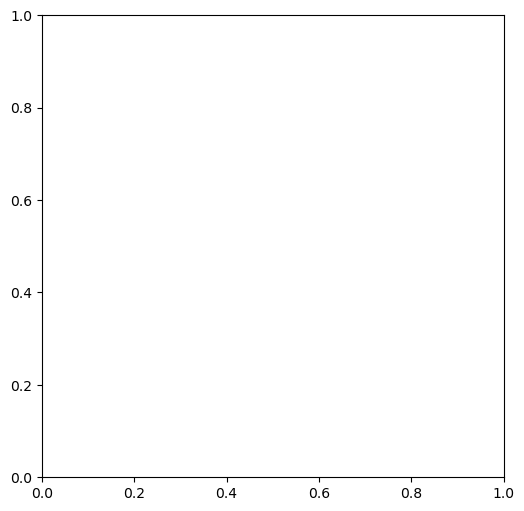

In [78]:
stopwords = set(STOPWORDS)
stopwords.update(['netflix', 'movie', 'show', 'time', 'app', 'series', 'phone'])

plt.figure(figsize=(12,6))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')

wc = WordCloud(width=800, height=400,background_color = 'white', stopwords=stopwords).generate(text)
wc.words_
